<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Подготовка-констант" data-toc-modified-id="Подготовка-констант-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка констант</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Описание-ряда" data-toc-modified-id="Описание-ряда-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Описание ряда</a></span></li><li><span><a href="#Тренды-и-сезонность" data-toc-modified-id="Тренды-и-сезонность-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Тренды и сезонность</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Разбиение-данных" data-toc-modified-id="Разбиение-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разбиение данных</a></span></li><li><span><a href="#Прогноз-по-предыдущему-значению" data-toc-modified-id="Прогноз-по-предыдущему-значению-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Прогноз по предыдущему значению</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [3]:
try:
    df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except:
    df = pd.read_csv(r'E:\Practicum\2_Projects_Git\12_forecasting_taxi_orders\taxi.csv', index_col=[0], parse_dates=[0])

display(df.shape);

(26496, 1)

### Подготовка констант

In [4]:
RANDOM_STATE = 1

### Знакомство с данными

In [5]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Датасет содержит 26496 строк, теперь уже 1 столбцец (т.к. даты были вынесены в индекс) и 0 нулевых значений.

### Подготовка данных

In [7]:
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


Проверим, лежат ли данные упорядоченно по времени.

In [8]:
df.index.is_monotonic

True

### Ресемплирование

In [9]:
df = df.resample('1H').sum()
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


На выходе, после обработки данных имеем датасет из 4416 строк, с индексами - датами и временем, с интервалом в один час. Данные в столбце отражают количество заказов такси за каждый час.

### Описание ряда

In [10]:
df1 = df.copy()
df1['rolling_mean'] = df1.rolling(100).mean()
df1['std'] =df1['num_orders'].rolling(100).std()
df1

,num_orders,rolling_mean,std
datetime,,,
2018-03-01 00:00:00,124,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN
...,...,...,...
2018-08-31 19:00:00,136,156.74,58.703952
2018-08-31 20:00:00,154,156.63,58.698623
2018-08-31 21:00:00,159,156.40,58.643246


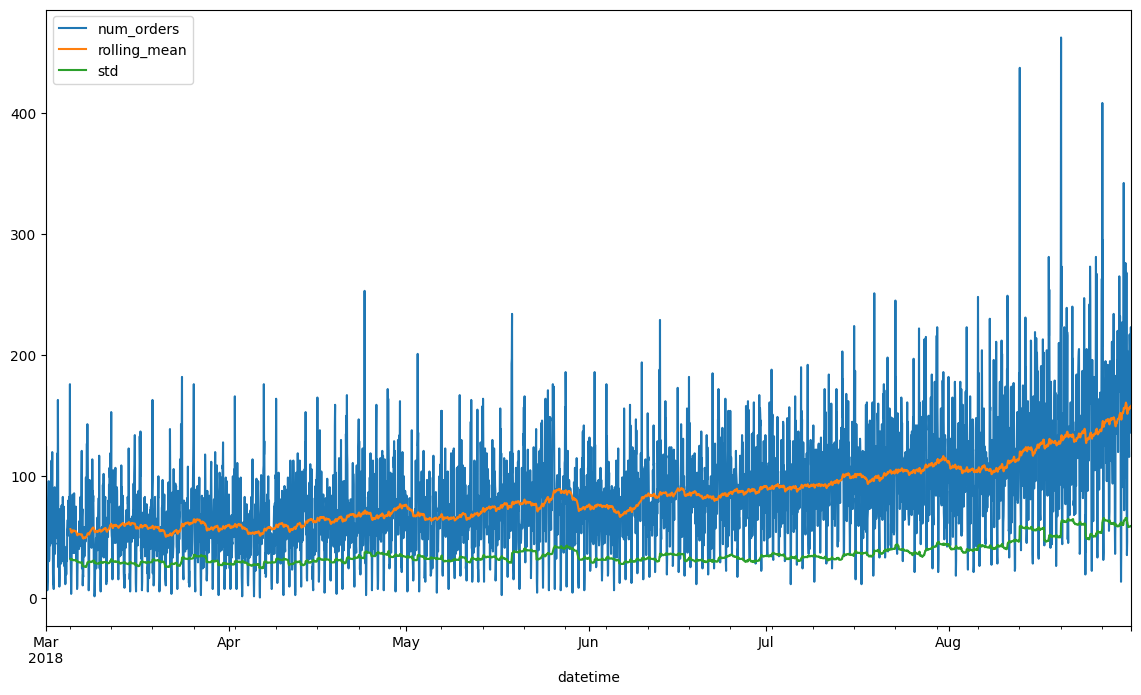

In [11]:
df1.plot(figsize=(14, 8));

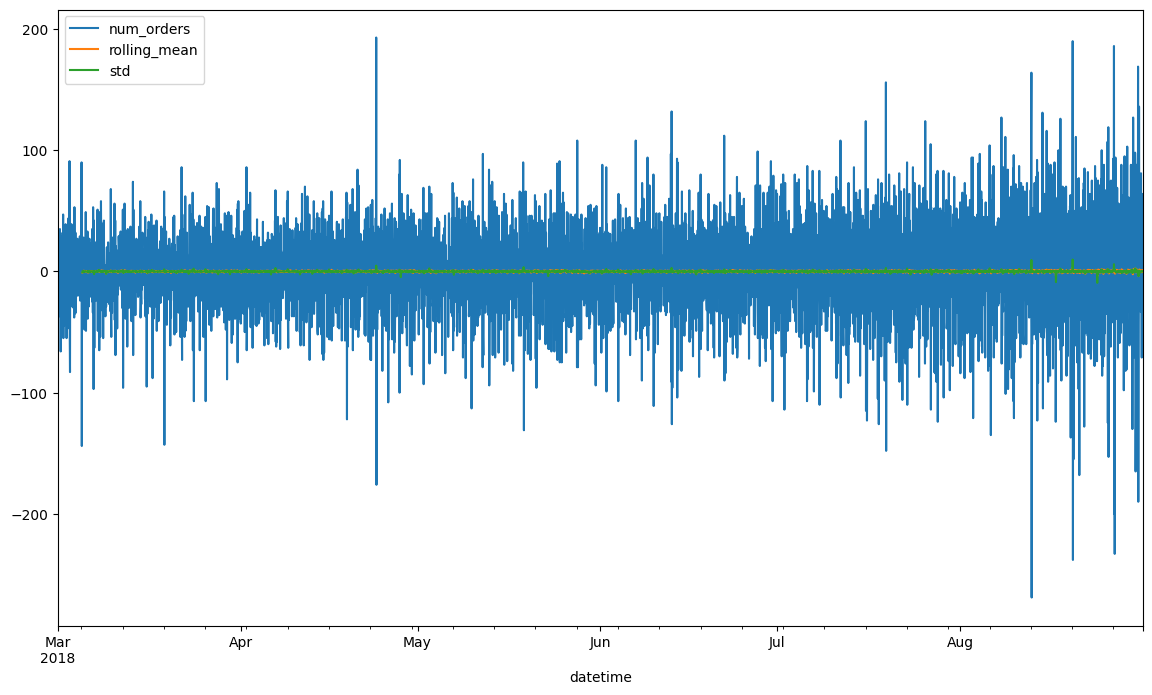

In [12]:
df2 = df1 - df1.shift()
df2.plot(figsize=(14, 8));

In [13]:
ts = df['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Нулевая гипотеза: Ряд не стационарный')
if st_test[1] < 0.05:
    print('Отвергаем H0: Ряд стационарный')
else:
    print('Принимаем H0: Ряд не стационарный')

Нулевая гипотеза: Ряд не стационарный
Отвергаем H0: Ряд стационарный


### Тренды и сезонность

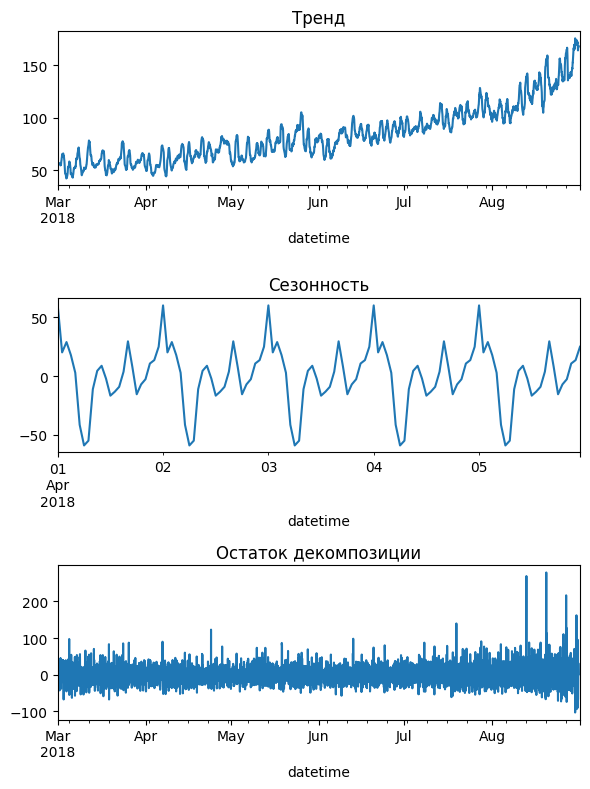

In [14]:
decomposed = seasonal_decompose(df['num_orders'])
#decomposed.plot()

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
#сезонность выводим за 5 дней. очевидно, что 1 сезон - это одни сутки
decomposed.seasonal['2018-04':'2018-04-5'].plot(ax=plt.gca()) 
plt.title('Сезонность')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остаток декомпозиции')
plt.tight_layout()

Прослеживается явный тренд - увеличение количества заказов в день.

## Анализ

### Создание признаков

In [15]:
#создаем функцию с 3 аргументами: датасет, количество смещений и окно для скользящего среднего
def make_features(data, max_lag, rolling_mean_size):  
    data['week'] = data.index.isocalendar().week.astype('int') #день
    data['dayofweek'] = data.index.dayofweek + 1 #день недели + 1 (так как с 0 начинается)
    data['hour'] = data.index.hour #час

    for lag in range(1, max_lag + 1): #делаем цикл для смещений
        #создаем столбец с номером смещения и с таким же количеством смещений назад как в аргументе
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag) 

    #создаем столбец скользящего среднего, смещенного на -1, с окном, равным значению в аргументе
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean() 


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [17]:
make_features(df, 50, 10)

In [18]:
df.head()

,num_orders,week,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,9,4,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,9,4,1,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,9,4,2,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,9,4,3,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,9,4,4,66.0,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Разбиение данных

In [19]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)

После разбиения данных в обучающей выборке (т.е. от начала ряда, т.к. мы не перемешиваем), образовались пустые значения. Их нужно удалить.

In [20]:
train = train.dropna()

In [21]:
features_train = train.drop('num_orders', axis=1)
features_test = test.drop('num_orders', axis=1)
target_train = train['num_orders']
target_test = test['num_orders']

Все признаки готовы для дальнейшего обучения.

### Прогноз по предыдущему значению

In [22]:
pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]
print("RMSE:", round((mean_squared_error(target_test, pred_previous))**(0.5), 2))

RMSE: 58.86


Получили значение метрики RMSE около 59, что, конечно же не удовлетворяет условию, но имеет смыс для сравнения с реальными моделями в дальнейшем.

## Обучение

Кросс-валидацию зададим методом `TimeSeriesSplit`, для того, чтобы при каждом делении выборки, тестовые индексы были позже обучающих. 

In [23]:
tscv = TimeSeriesSplit(n_splits=10)

### Линейная регрессия

Начнем с довольно простой и очень быстрой модели - линейной регрессии:

In [24]:
%%time

lin_reg_cv = LinearRegression()
lin_reg_cv_scores = cross_val_score(lin_reg_cv, features_train, target_train.values, scoring='neg_root_mean_squared_error', cv=tscv)
lin_reg_cv_rmse = round(abs(lin_reg_cv_scores.mean()), 2)

print("Среднее значение метрики RMSE для модели линейной регрессии "\
    "с использованием кросс-валидации:", lin_reg_cv_rmse)

Среднее значение метрики RMSE для модели линейной регрессии с использованием кросс-валидации: 24.13
CPU times: total: 15.6 ms
Wall time: 210 ms


Итак, линейная регрессия показывает отличный результат для метрики RMSE. Рассмотрим также модель случайного леса, а также модель с использованием бустинга - `LightGBM`.

### Случайный лес

Гиперпараметры для модели случайного леса будем перебирать с помощью `RandomizedSearchCV` - это значительно ускорит подбор параметров, не сильно ухудшив значение итоговой метрики `RMSE`. 

In [25]:
%%time

random_forest = RandomForestRegressor(random_state=RANDOM_STATE) #модель случайного леса
parameters = {'n_estimators': range (1, 300), 'max_depth': range (1, 100)} #перебор гиперпараметров
#применение метода гридсёрч со встроенной кросс-валидацией к модели леса с перебором указанных параметров

randomized_random_forest = RandomizedSearchCV(random_forest, n_iter=20, param_distributions= parameters, scoring='neg_root_mean_squared_error', n_jobs= -2, cv=tscv, random_state=RANDOM_STATE)
#обучение модели
randomized_random_forest.fit(features_train, target_train.values)

#лучшее значение после перебора параметров 
best_randomized_forest = abs(randomized_random_forest.best_score_)

print("Лучшие параметры для модели случайного леса с "\
    "использованием кросс-валидации:", randomized_random_forest.best_params_)
print("Наименьшее значение метрики RMSE для модели случайного леса "\
    "при лучших гиперпараметрах с использованием кросс-валидации:", round(best_randomized_forest, 2))

Лучшие параметры для модели случайного леса с использованием кросс-валидации: {'n_estimators': 88, 'max_depth': 43}
Наименьшее значение метрики RMSE для модели случайного леса при лучших гиперпараметрах с использованием кросс-валидации: 23.34
CPU times: total: 3.17 s
Wall time: 5min 3s


Модель случайного леса показывает меньшее значение метрики `RMSE`, чем модель линейной регрессии, но для нее требуется большее время.

### LightGBM

Среди признаков нет таких, которые нужно вынести в категории для модели `LightGBM`, поэтому можно сразу использовать исходные выборки.

In [26]:
%%time

lgb_forest = lgb.LGBMModel(objective="regression", random_state=RANDOM_STATE) #
parameters = {'n_estimators': range (1, 1000), 'max_depth': range (1, 100), 'learning_rate': (0.01, 0.5, 0.01)}
#применение метода гридсёрч со встроенной кросс-валидацией

rand_lgb_forest = RandomizedSearchCV(lgb_forest, n_iter=20, param_distributions= parameters, scoring='neg_root_mean_squared_error', n_jobs= -2, cv=tscv, random_state=RANDOM_STATE)
#обучение модели
rand_lgb_forest.fit(features_train, target_train.values)

#лучшее значение после перебора параметров 
best_rand_lgb_forest = abs(rand_lgb_forest.best_score_)

print("Лучшие параметры для модели LightGBM с "\
    "использованием кросс-валидации:", rand_lgb_forest.best_params_)
print("Наименьшее значение метрики RMSE для модели LightGBM "\
    "при лучших гиперпараметрах с использованием кросс-валидации:", round(best_rand_lgb_forest, 2))

Лучшие параметры для модели LightGBM с использованием кросс-валидации: {'n_estimators': 750, 'max_depth': 32, 'learning_rate': 0.01}
Наименьшее значение метрики RMSE для модели LightGBM при лучших гиперпараметрах с использованием кросс-валидации: 23.15
CPU times: total: 14.7 s
Wall time: 45.7 s


`LightGBM` показала самые невысокие значения метрики `RMSE`, а значит, именно на этой модели будем считать `RMSE` на тестовых данных.

## Тестирование

Обучаем лучшую модель с лучшим набором гиперпараметров на обучающих данных и тестируем на тестовых.

In [27]:
lgb_forest_1 = lgb.LGBMModel(
    objective="regression", 
    n_estimators=rand_lgb_forest.best_params_['n_estimators'], 
    max_depth=rand_lgb_forest.best_params_['max_depth'], 
    learning_rate=rand_lgb_forest.best_params_['learning_rate'])
lgb_forest_1.fit(features_train, target_train.values)

predictions_lgb_forest_1 = lgb_forest_1.predict(features_test)

lgb_forest_1_rmse = (abs(mean_squared_error(target_test, predictions_lgb_forest_1)))**0.5
print("Наименьшее значение метрики RMSE на тестовых данных", round(lgb_forest_1_rmse, 2))

Наименьшее значение метрики RMSE на тестовых данных 39.48


## Выводы

В проекте мы обработали данные и подготовили их к обучению. Итоговой метрикой в проекте принята `RMSE`. Минимальное значение `RMSE` было получено у модели `LightGBM`. Именно на этой модели были сделаны предсказания для тестовой выборки.

При условии получения значения `RMSE` меньше 48 на тестовых данных получили `RMSE` равным 39,48.